<a href="https://colab.research.google.com/github/Alltristans/Financial-Data-Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Alridho_Tristan_Satriawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#Sumber Dataset : Kaggle
#Ketentuan : Tanpa Label, 89244 Baris, terdapat kategorikal dan numerikal

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
!pip install gdown
import gdown
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
url = 'https://drive.google.com/uc?id=1607a8SCoqN1P_96lI1v3DqESjE0_-l3z'
output = 'data.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1607a8SCoqN1P_96lI1v3DqESjE0_-l3z
To: /content/data.csv
100%|██████████| 7.31M/7.31M [00:00<00:00, 25.6MB/s]


,symbol,account,type,2020,2021,2022,2023
0,AALI,Accounts Payable,BS,7.702640e+11,1.026717e+12,1.224423e+12,8.420640e+11
1,AALI,Accounts Receivable,BS,7.658490e+11,4.581350e+11,8.487700e+11,6.744870e+11
2,AALI,Accumulated Depreciation,BS,-1.092095e+13,-1.213381e+13,-1.330375e+13,-1.443685e+13
3,AALI,Additional Paid In Capital,BS,3.878995e+12,3.878995e+12,3.878995e+12,3.878995e+12
4,AALI,Allowance For Doubtful Accounts Receivable,BS,-2.426100e+10,-2.454300e+10,-2.705700e+10,-2.651600e+10


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89243 entries, 0 to 89242
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   symbol   89243 non-null  object 
 1   account  89243 non-null  object 
 2   type     89243 non-null  object 
 3   2020     83988 non-null  float64
 4   2021     84474 non-null  float64
 5   2022     83634 non-null  float64
 6   2023     69831 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.8+ MB


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values per Column:
 symbol         0
account        0
type           0
2020        5255
2021        4769
2022        5609
2023       19412
dtype: int64

Number of Duplicate Rows: 0


In [ ]:
df.describe()

,2020,2021,2022,2023
count,8.398800e+04,8.447400e+04,8.363400e+04,6.983100e+04
mean,1.197697e+12,1.399118e+12,1.497669e+12,1.714984e+12
std,1.532871e+13,1.717454e+13,1.889606e+13,2.166294e+13
min,-4.127934e+14,-4.826358e+14,-5.610016e+14,-5.709176e+14
25%,0.000000e+00,1.648572e-01,3.511105e-01,8.170234e+04
50%,6.334818e+09,7.411000e+09,8.395047e+09,1.168128e+10
75%,2.220000e+11,2.609188e+11,2.965390e+11,3.485207e+11
max,1.610065e+15,1.725611e+15,1.992545e+15,2.174219e+15


In [ ]:
df.head()

,symbol,account,type,2020,2021,2022,2023
0,AALI,Accounts Payable,BS,7.702640e+11,1.026717e+12,1.224423e+12,8.420640e+11
1,AALI,Accounts Receivable,BS,7.658490e+11,4.581350e+11,8.487700e+11,6.744870e+11
2,AALI,Accumulated Depreciation,BS,-1.092095e+13,-1.213381e+13,-1.330375e+13,-1.443685e+13
3,AALI,Additional Paid In Capital,BS,3.878995e+12,3.878995e+12,3.878995e+12,3.878995e+12
4,AALI,Allowance For Doubtful Accounts Receivable,BS,-2.426100e+10,-2.454300e+10,-2.705700e+10,-2.651600e+10


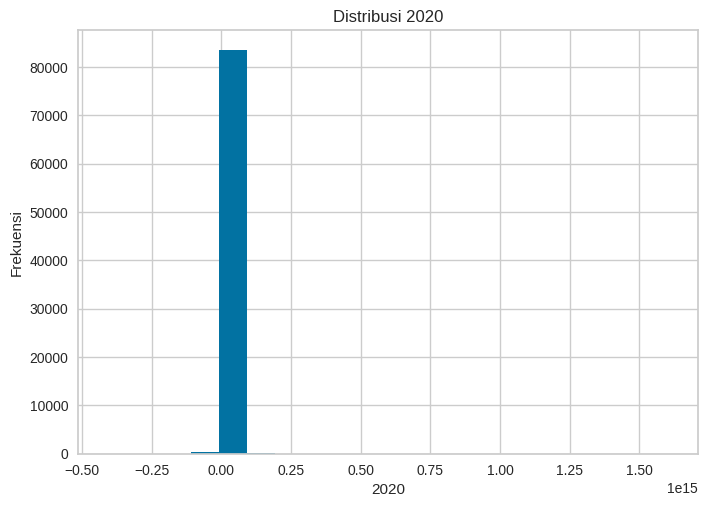

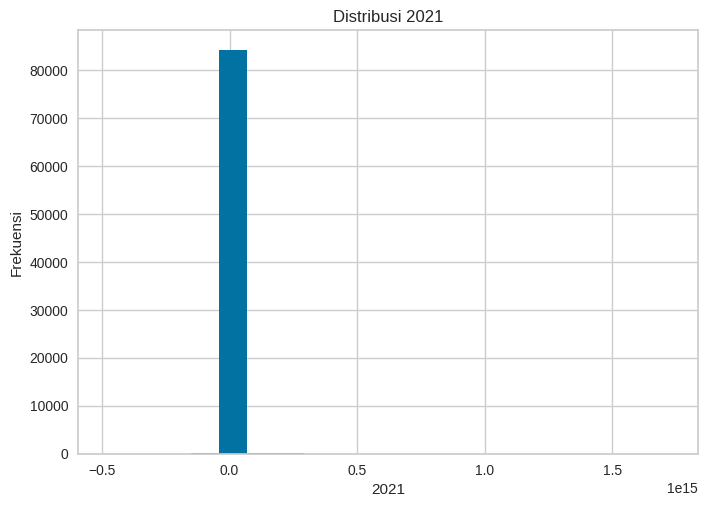

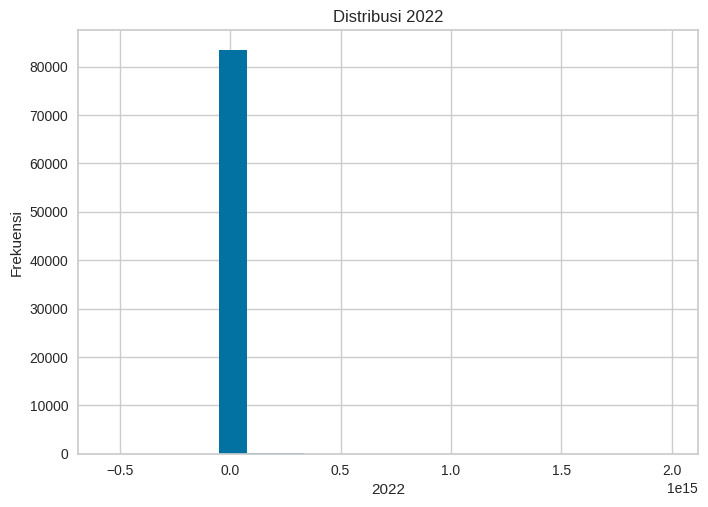

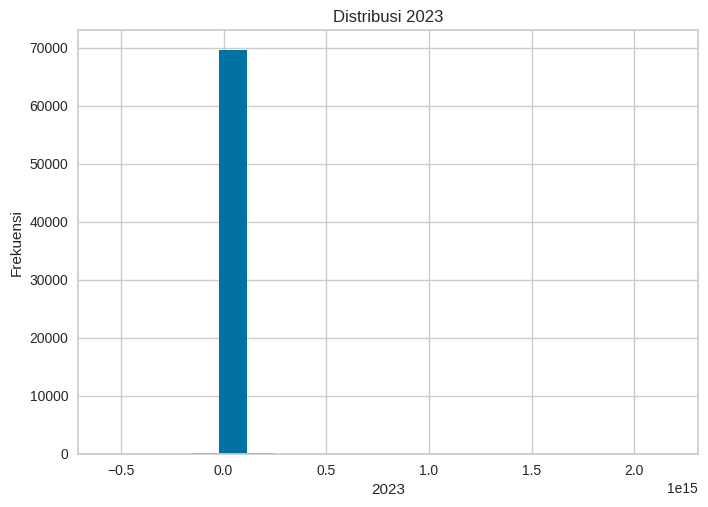

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = ['2020', '2021', '2022', '2023']

for column in columns_to_plot:
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi {column}')
    plt.show()

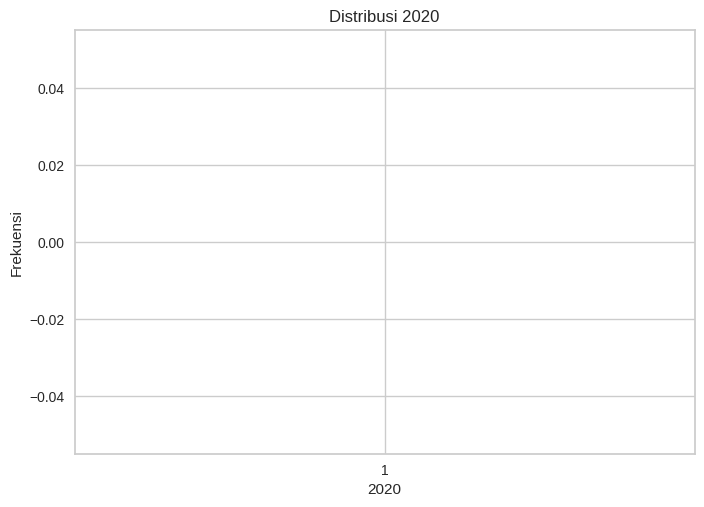

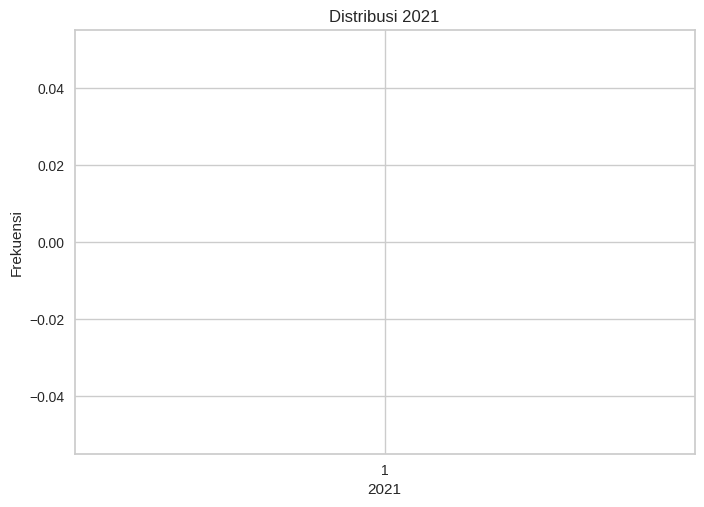

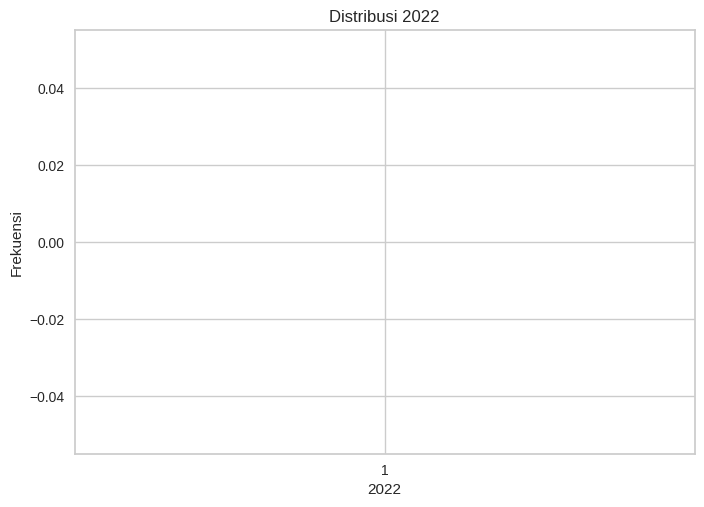

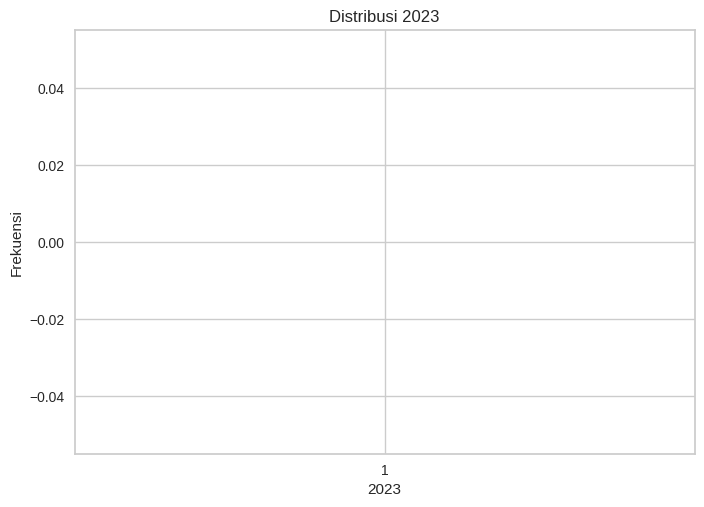

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = ['2020', '2021', '2022', '2023']

for column in columns_to_plot:
    plt.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi {column}')
    plt.show()

In [ ]:
correlation_matrix = df[['2020', '2021', '2022', '2023']].corr()

print(correlation_matrix)

          2020      2021      2022      2023
2020  1.000000  0.978957  0.978290  0.980944
2021  0.978957  1.000000  0.988048  0.972151
2022  0.978290  0.988048  1.000000  0.985776
2023  0.980944  0.972151  0.985776  1.000000


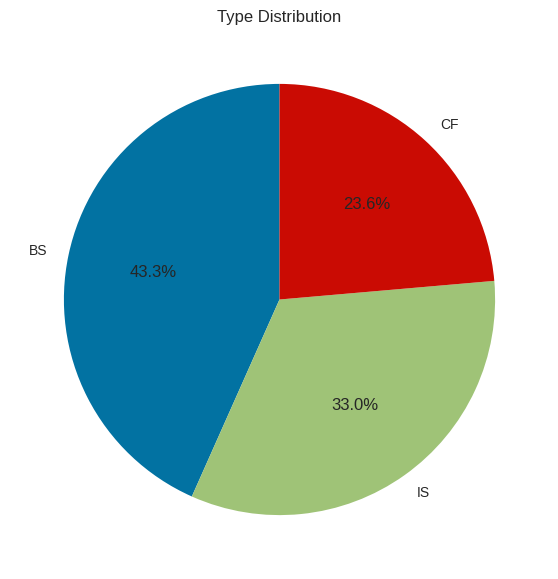

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df['type'].value_counts(), labels=['BS', 'IS', 'CF'], autopct='%1.1f%%', startangle=90)
plt.title('Type Distribution')
plt.show()

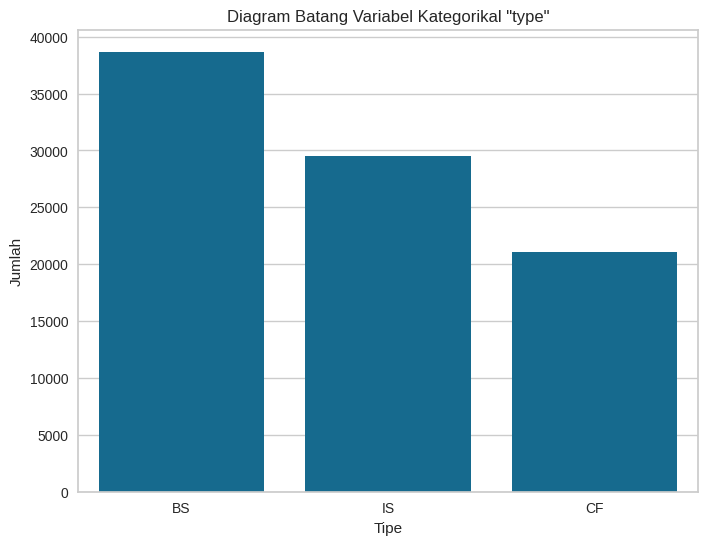

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Diagram Batang Variabel Kategorikal "type"')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.show()

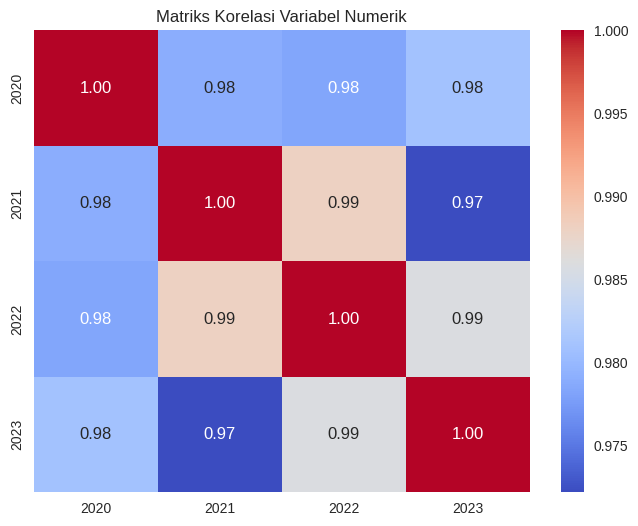

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df[['2020', '2021', '2022', '2023']] = imputer.fit_transform(df[['2020', '2021', '2022', '2023']])

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values per Column:
 symbol     0
account    0
type       0
2020       0
2021       0
2022       0
2023       0
dtype: int64

Number of Duplicate Rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89243 entries, 0 to 89242
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   symbol   89243 non-null  object 
 1   account  89243 non-null  object 
 2   type     89243 non-null  object 
 3   2020     89243 non-null  float64
 4   2021     89243 non-null  float64
 5   2022     89243 non-null  float64
 6   2023     89243 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.8+ MB


In [ ]:
df = df.drop_duplicates()

duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows after dropping:", duplicate_rows)


Number of Duplicate Rows after dropping: 0


In [ ]:
duplicate_rows = df.duplicated()
print("\nNumber of Duplicate Rows:", duplicate_rows.sum())
print("\nDuplicate Rows:\n", df[duplicate_rows])
df_no_duplicates = df.drop_duplicates()
print("\nNumber of rows after removing duplicates:", len(df_no_duplicates))


Number of Duplicate Rows: 0

Duplicate Rows:
 Empty DataFrame
Columns: [symbol, account, type, 2020, 2021, 2022, 2023]
Index: []

Number of rows after removing duplicates: 89243


In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for col in ['2020', '2021', '2022', '2023']:
  outliers = detect_outliers_iqr(df[col])
  print(f"Outliers in {col}:\n{outliers}\n")

def cap_outliers(data, lower_bound, upper_bound):
    data = data.clip(lower=lower_bound, upper=upper_bound)
    return data

for col in ['2020', '2021', '2022', '2023']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = cap_outliers(df[col], lower_bound, upper_bound)

for col in ['2020', '2021', '2022', '2023']:
  outliers = detect_outliers_iqr(df[col])
  print(f"Outliers in {col} after capping:\n{outliers}\n")

Outliers in 2020:
0        7.702640e+11
1        7.658490e+11
2       -1.092095e+13
3        3.878995e+12
8        4.775744e+12
             ...     
89229    8.097624e+11
89230    5.287223e+11
89231    5.806864e+11
89232    1.027705e+12
89236    6.080990e+11
Name: 2020, Length: 19933, dtype: float64

Outliers in 2021:
0        1.026717e+12
2       -1.213381e+13
3        3.878995e+12
7        9.788920e+11
8        4.858140e+12
             ...     
89230    6.943308e+11
89231    1.171123e+12
89232    1.344396e+12
89233    9.170341e+11
89236    8.387651e+11
Name: 2021, Length: 19149, dtype: float64

Outliers in 2022:
0        1.224423e+12
1        8.487700e+11
2       -1.330375e+13
3        3.878995e+12
7        3.896022e+12
             ...     
89229    7.731216e+11
89231    1.702832e+12
89232    1.798178e+12
89233    9.948196e+11
89236    7.173416e+11
Name: 2022, Length: 18789, dtype: float64

Outliers in 2023:
0        8.420640e+11
2       -1.443685e+13
3        3.878995e+12
7      

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
print(df.head())

  symbol                                     account  type          2020  \
0   AALI                            Accounts Payable     0  5.029488e+11   
1   AALI                         Accounts Receivable     0  5.029488e+11   
2   AALI                    Accumulated Depreciation     0 -3.017693e+11   
3   AALI                  Additional Paid In Capital     0  5.029488e+11   
4   AALI  Allowance For Doubtful Accounts Receivable     0 -2.426100e+10   

           2021          2022          2023  
0  6.057948e+11  6.843420e+11  7.044059e+11  
1  4.581350e+11  6.843420e+11  6.744870e+11  
2 -3.634769e+11 -4.106052e+11 -4.226434e+11  
3  6.057948e+11  6.843420e+11  7.044059e+11  
4 -2.454300e+10 -2.705700e+10 -2.651600e+10  


In [ ]:
df.head()

,symbol,account,type,2020,2021,2022,2023
0,AALI,Accounts Payable,0,5.029488e+11,6.057948e+11,6.843420e+11,7.044059e+11
1,AALI,Accounts Receivable,0,5.029488e+11,4.581350e+11,6.843420e+11,6.744870e+11
2,AALI,Accumulated Depreciation,0,-3.017693e+11,-3.634769e+11,-4.106052e+11,-4.226434e+11
3,AALI,Additional Paid In Capital,0,5.029488e+11,6.057948e+11,6.843420e+11,7.044059e+11
4,AALI,Allowance For Doubtful Accounts Receivable,0,-2.426100e+10,-2.454300e+10,-2.705700e+10,-2.651600e+10


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

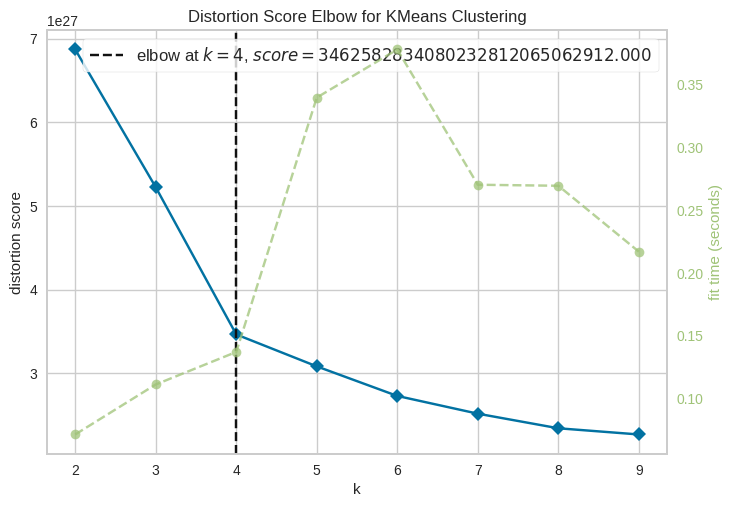

In [ ]:
features = ['2020', '2021', '2022', '2023', 'type']
X = df[features]


kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X)
visualizer.show()


optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)


df['cluster'] = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6833989403931829


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

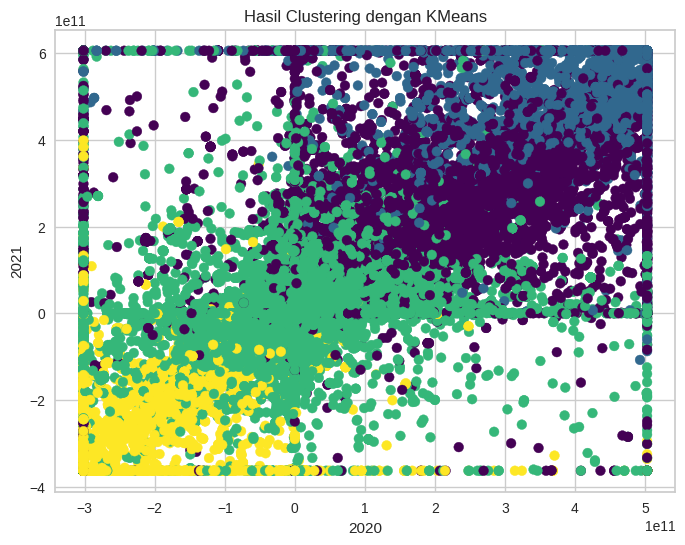

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Hasil Clustering dengan KMeans')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Cluster 1:
              type          2020          2021          2022          2023  \
count  17478.00000  1.747800e+04  1.747800e+04  1.747800e+04  1.747800e+04   
mean       0.60024  4.722738e+11  5.825809e+11  6.595127e+11  6.730971e+11   
std        0.85546  9.753599e+10  6.893872e+10  7.000639e+10  8.839675e+10   
min        0.00000 -3.017693e+11 -1.077460e+11  0.000000e+00 -4.677100e+10   
25%        0.00000  5.029488e+11  6.057948e+11  6.843420e+11  7.044059e+11   
50%        0.00000  5.029488e+11  6.057948e+11  6.843420e+11  7.044059e+11   
75%        1.00000  5.029488e+11  6.057948e+11  6.843420e+11  7.044059e+11   
max        2.00000  5.029488e+11  6.057948e+11  6.843420e+11  7.044059e+11   

       cluster  
count  17478.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  

Distribution of 'type':
type
0    64.566884
2    24.590914
1    10.842202
Name: proportion, dtype: float64


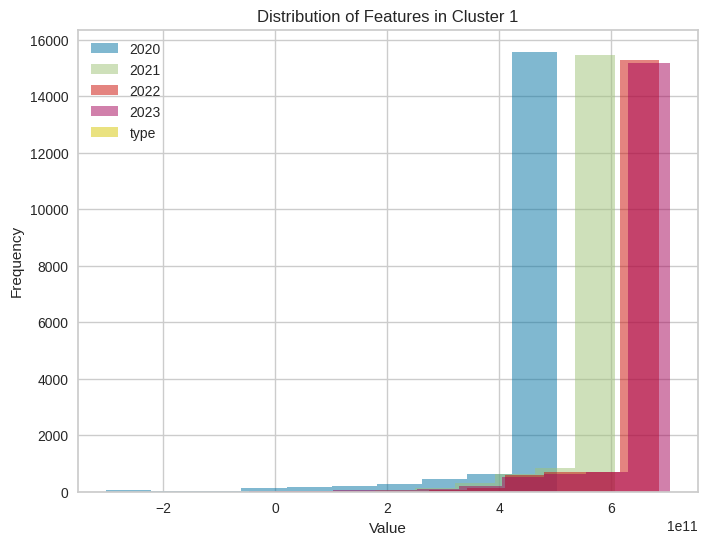


Cluster 3:
              type          2020          2021          2022          2023  \
count  4728.000000  4.728000e+03  4.728000e+03  4.728000e+03  4.728000e+03   
mean      0.992174 -2.407274e+11 -2.970398e+11 -3.412385e+11 -3.478677e+11   
std       0.543187  1.150302e+11  1.087895e+11  1.095375e+11  1.261179e+11   
min       0.000000 -3.017693e+11 -3.634769e+11 -4.106052e+11 -4.226434e+11   
25%       1.000000 -3.017693e+11 -3.634769e+11 -4.106052e+11 -4.226434e+11   
50%       1.000000 -3.017693e+11 -3.634769e+11 -4.106052e+11 -4.226434e+11   
75%       1.000000 -2.092632e+11 -2.388395e+11 -2.822742e+11 -2.954982e+11   
max       2.000000  5.029488e+11  3.989330e+11  2.930440e+11  3.292260e+11   

       cluster  
count   4728.0  
mean       3.0  
std        0.0  
min        3.0  
25%        3.0  
50%        3.0  
75%        3.0  
max        3.0  

Distribution of 'type':
type
1    70.494924
0    15.143824
2    14.361252
Name: proportion, dtype: float64


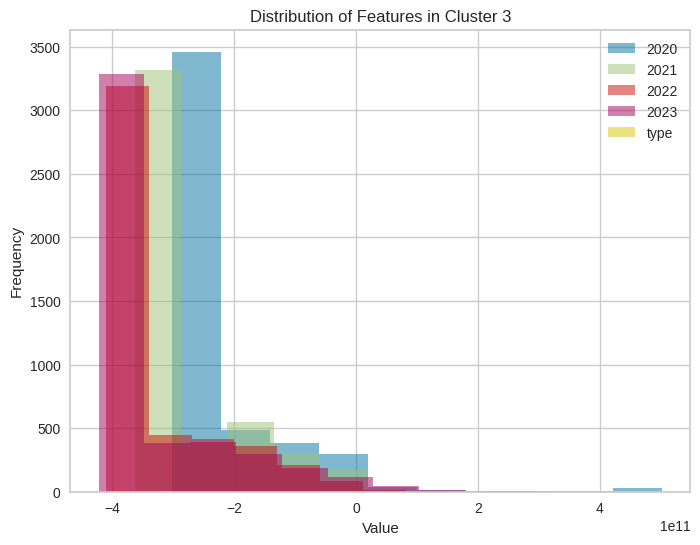


Cluster 2:
               type          2020          2021          2022          2023  \
count  56561.000000  5.656100e+04  5.656100e+04  5.656100e+04  5.656100e+04   
mean       1.004844  9.882548e+09  1.054971e+10  1.067400e+10  1.034038e+10   
std        0.868784  7.508087e+10  7.203262e+10  7.264502e+10  7.708171e+10   
min        0.000000 -3.017693e+11 -3.634769e+11 -4.106052e+11 -4.226434e+11   
25%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%        1.000000  2.749660e+08  3.646990e+08  5.124054e+08  7.590210e+08   
75%        2.000000  1.305427e+10  1.350254e+10  1.737500e+10  1.915700e+10   
max        2.000000  5.029488e+11  6.057948e+11  6.843420e+11  7.044059e+11   

       cluster  
count  56561.0  
mean       2.0  
std        0.0  
min        2.0  
25%        2.0  
50%        2.0  
75%        2.0  
max        2.0  

Distribution of 'type':
type
2    37.982002
0    37.497569
1    24.520429
Name: proportion, dtype: float64


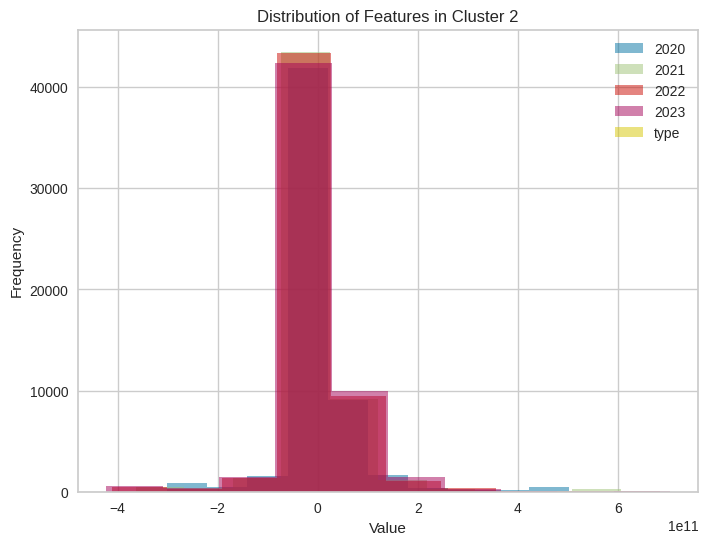


Cluster 0:
               type          2020          2021          2022          2023  \
count  10476.000000  1.047600e+04  1.047600e+04  1.047600e+04  1.047600e+04   
mean       0.767278  1.833463e+11  2.291366e+11  2.622290e+11  2.925275e+11   
std        0.869786  1.717006e+11  1.792608e+11  1.908741e+11  2.110862e+11   
min        0.000000 -3.017693e+11 -3.634769e+11 -4.106052e+11 -4.226434e+11   
25%        0.000000  7.190226e+10  1.267585e+11  1.534416e+11  1.642463e+11   
50%        0.000000  1.725208e+11  2.076472e+11  2.427137e+11  2.570601e+11   
75%        2.000000  2.882794e+11  3.243524e+11  3.598902e+11  3.972192e+11   
max        2.000000  5.029488e+11  6.057948e+11  6.843420e+11  7.044059e+11   

       cluster  
count  10476.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Distribution of 'type':
type
0    52.166858
2    28.894616
1    18.938526
Name: proportion, dtype: float64


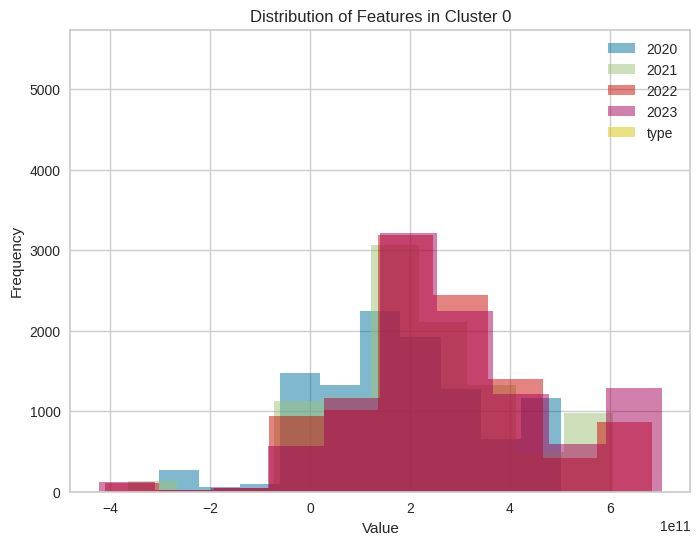

In [ ]:
for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(cluster_data.describe())
    for column in ['type']:
        print(f"\nDistribution of '{column}':")
        print(cluster_data[column].value_counts(normalize=True) * 100)

    plt.figure(figsize=(8, 6))
    for column in features:
        plt.hist(cluster_data[column], alpha=0.5, label=column)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Features in Cluster {cluster_label}")
    plt.legend()
    plt.show()

Tulis hasil interpretasinya di sini.

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

1. Cluster 0:

* Rata-rata 2020: 1.833463e+11
* Rata-rata 2021: 2.291366e+11
* Rata-rata 2022: 2.622290e+11
* Rata-rata 2023: 2.925275e+11
* Dominasi Tipe: BS (52.17%), CF (28.89%), IS (18.94%)
* Analisis: Cluster ini mencakup entitas dengan nilai yang relatif tinggi dan cenderung stabil selama periode 2020-2023, menunjukkan pertumbuhan yang positif. Sebagian besar entitas di cluster ini bertipe BS dan dapat dianggap memiliki kinerja yang baik dan terus bertumbuh. Keberadaan tipe CF dan IS yang cukup signifikan juga menunjukkan adanya variasi dalam karakteristik dan kinerja entitas di cluster ini, meskipun proporsinya lebih kecil. Entitas di cluster ini cenderung berukuran sedang hingga besar dengan kinerja keuangan yang relatif baik dan potensi pertumbuhan yang positif.

2. Cluster 1:
* Rata-rata 2020: 4.722738e+11
* Rata-rata 2021: 5.825809e+11
* Rata-rata 2022: 6.595127e+11
* Rata-rata 2023: 6.730971e+11
* Dominasi Tipe: BS (64.57%), CF (24.59%), IS (10.84%)
* Analisis: Cluster ini menunjukkan entitas dengan nilai yang sangat tinggi dan stabil selama periode 2020-2023. Sebagian besar entitas di cluster ini bertipe BS dan dapat dianggap memiliki kinerja yang sangat tinggi dan terus bertumbuh. Keberadaan tipe CF dan IS yang cukup signifikan juga menunjukkan adanya variasi dalam karakteristik dan kinerja entitas di cluster ini, meskipun proporsinya lebih kecil. Entitas di cluster ini cenderung berukuran besar dan memiliki kinerja keuangan yang baik.

3. Cluster 2:
* Rata-rata 2020: 9.882548e+09
* Rata-rata 2021: 1.054971e+10
* Rata-rata 2022: 1.067400e+10
* Rata-rata 2023: 1.034038e+10
* Dominasi Tipe: CF (37.98%), BS (37.50%), IS (24.52%)
* Analisis: Cluster ini terdiri dari entitas dengan nilai yang relatif rendah dan cenderung stabil selama periode 2020-2023. Didominasi oleh tipe CF dan diikuti oleh BS, cluster ini menunjukkan entitas yang mungkin memiliki skala usaha yang lebih kecil atau berada dalam tahap awal perkembangan. Meskipun nilai rata-ratanya relatif rendah, stabilitas nilai selama periode tersebut mengindikasikan adanya potensi pertumbuhan yang stabil. Keberadaan tipe IS yang cukup signifikan menunjukkan adanya variasi dalam karakteristik dan kinerja entitas di cluster ini. Cluster ini dapat dianggap sebagai kelompok entitas dengan kinerja yang moderat dan beragam, dengan potensi pertumbuhan yang terbatas.

4. Cluster 3:
* Rata-rata 2020: -2.407274e+11
* Rata-rata 2021: -2.970398e+11
* Rata-rata 2022: -3.412385e+11
* Rata-rata 2023: -3.478677e+11
* Dominasi Tipe: IS (70.49%), BS (15.14%), CF (14.36%)
* Analisis: Cluster ini terdiri dari entitas dengan nilai yang negatif dan cenderung menurun selama periode 2020-2023. Didominasi oleh tipe IS, cluster ini mengindikasikan entitas yang mungkin sedang mengalami kesulitan keuangan atau penurunan kinerja. Meskipun ada sebagian kecil entitas bertipe BS dan CF, mayoritas entitas di cluster ini menunjukkan tren negatif. Cluster ini dapat dianggap sebagai kelompok entitas dengan kinerja yang buruk dan cenderung merugi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
from google.colab import files
df.to_csv('clustered_data.csv', encoding = 'utf-8-sig')
files.download('clustered_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>